# Análise do conjunto de dados CSTNews




# 1 Preparação do ambiente

Preparação do ambiente para execução do script.

## 1.1 Tempo inicial de processamento

In [ ]:
# Import das bibliotecas
import time
import datetime

# Marca o tempo de início do processamento
inicioProcessamento = time.time()

## 1.2 Tratamento de logs

In [ ]:
# Biblioteca de logging
import logging

# Formatando a mensagem de logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## 1.3 Identificando o ambiente Colab

In [ ]:
# Se estiver executando no Google Colaboratory
import sys

# Retorna true ou false se estiver no Google Colaboratory
IN_COLAB = 'google.colab' in sys.modules

## 1.4 Biblioteca de limpeza de tela

In [ ]:
from IPython.display import clear_output

## 1.5 Instalação do wandb

Instalação

In [ ]:
!pip install --upgrade wandb

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
     |████████████████████████████████| 133 kB 43.2 MB/s 
     |████████████████████████████████| 170 kB 37.9 MB/s 
     |████████████████████████████████| 97 kB 5.4 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=0268b88f787619c6afa3dbae16260612038cd90d7c2945f92c5bdd5b505bf9eb
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=39c09bdb458005abe3a6e4b4d0d3842383b733f3459bc7585e9c2d47e6d93fcc
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


## 1.6 Instalação BERT da Hugging Face

Instala a interface pytorch para o BERT by Hugging Face. 

In [ ]:
!pip install -U transformers==4.5.1

     |████████████████████████████████| 2.1 MB 5.2 MB/s 
     |████████████████████████████████| 895 kB 57.9 MB/s 
     |████████████████████████████████| 3.3 MB 41.6 MB/s 


## 1.7 Instalação do spaCy



https://spacy.io/

Modelos do spaCy para português:
https://spacy.io/models/pt

In [ ]:
# Instala o spacy
!pip install -U spacy==2.3.5

     |████████████████████████████████| 10.4 MB 4.1 MB/s 
     |████████████████████████████████| 1.0 MB 14.0 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


## 1.8 Recupera o cohebert do Github

In [ ]:
!git clone https://github.com/osmarbraz/cohebert_v1.git

Cloning into 'cohebert_v1'...
remote: Enumerating objects: 4744, done.
remote: Counting objects: 100% (376/376), done.
remote: Compressing objects: 100% (246/246), done.
remote: Total 4744 (delta 253), reused 231 (delta 125), pack-reused 4368
Receiving objects: 100% (4744/4744), 28.71 MiB | 19.40 MiB/s, done.
Resolving deltas: 100% (3008/3008), done.


In [ ]:
#Muda o diretório corrente para a pasta clonada
import sys
sys.path.append('./cohebert_v1/cohebert')

In [ ]:
# Biblioteca cohebert
from util.utilmodulo import *
from util.utiltempo import *
from util.utilarquivo import *

# 2 Parametrização

In [ ]:
# Biblioteca cohebert
from bert.bertarguments import ModeloArgumentosMedida

# Definição dos parâmetros do Modelo para o cálculo de Medida
model_args = ModeloArgumentosMedida(     
    max_seq_len = 512,
    #pretrained_model_name_or_path = 'neuralmind/bert-large-portuguese-cased',
    #pretrained_model_name_or_path = 'https://neuralmind-ai.s3.us-east-2.amazonaws.com/nlp/bert-large-portuguese-cased/bert-large-portuguese-cased_pytorch_checkpoint.zip',
    #pretrained_model_name_or_path = 'neuralmind/bert-base-portuguese-cased',
    pretrained_model_name_or_path = 'https://neuralmind-ai.s3.us-east-2.amazonaws.com/nlp/bert-base-portuguese-cased/bert-base-portuguese-cased_pytorch_checkpoint.zip',       
    #pretrained_model_name_or_path = 'bert-base-multilingual-cased',
    modelo_spacy = 'pt_core_news_lg',
    versao_spacy = '2.3.0',
    do_lower_case = False,   # default True
    output_attentions = False,    # default False
    output_hidden_states = False, # default False    
    estrategia_pooling = 0, # 0 - MEAN estratégia média / 1 - MAX  estratégia maior
    palavra_relevante = 0 # 0 - Considera todas as palavras das sentenças / 1 - Desconsidera as stopwords / 2 - Considera somente as palavras substantivas
)

# 3 spaCy

## Carrega o modelo do spacy

https://spacy.io/models/pt

In [ ]:
# Biblioteca cohebert
from spacynlp.spacymodulo import *

# Carrega o modelo
nlp = carregaSpacy(model_args)

2021-09-17 23:34:58,873 : INFO : Diretório Cohebert criado: coerenciabert
2021-09-17 23:34:58,875 : INFO : Download do arquivo do modelo do spaCy.
2021-09-17 23:34:59,160 : INFO : Download do arquivo: coerenciabert/pt_core_news_lg-2.3.0.tar.gz.


  0%|          | 0.00/577M [00:00<?, ?B/s]

2021-09-17 23:35:13,713 : INFO : Descompactando o arquivo do modelo do spaCy.
2021-09-17 23:35:26,369 : INFO : spaCy carregado.


# 4 BERT

## Carrega o modelo e tokenizador BERT

In [ ]:
# Biblioteca cohebert
from bert.bertmodulo import *

# Carrega o modelo e tokenizador BERT
model, tokenizer = carregaBERT(model_args)

2021-09-17 23:35:32,145 : INFO : Download do arquivo: bert-base-portuguese-cased_pytorch_checkpoint.zip.


  0%|          | 0.00/406M [00:00<?, ?B/s]

2021-09-17 23:35:47,460 : INFO : Download do arquivo: coerenciabert/modeloBERT/vocab.txt.


  0%|          | 0.00/210k [00:00<?, ?B/s]

2021-09-17 23:35:47,597 : INFO : Diretório coerenciabert/modeloBERT do modelo BERT pronta!
2021-09-17 23:35:47,666 : INFO : Usando modelo BERT pré-treinado.
2021-09-17 23:35:47,668 : INFO : Carregando o modelo BERT do diretório coerenciabert/modeloBERT para cálculo de medidas.
2021-09-17 23:35:50,207 : INFO : Carregando o tokenizador BERT do diretório coerenciabert/modeloBERT.


# 5 Estatísticas CSTNews Sumários Multidocumentos

Trabalho Marcio Dias:

https://sites.icmc.usp.br/taspardo/Summary%20coherence%20models.zip

## 5.1 Carregamento do arquivo



In [ ]:
# Biblioteca cohebert
from conjuntodedados.dadoscstnewsmedida import *

# Carrega as listas
lista_documentos_originais, lista_documentos_permutados = getListasDocumentosMedidas(None)

2021-09-17 23:35:50,357 : INFO : Realizando o download do CSTNews do meu OneDrive.
2021-09-17 23:35:52,454 : INFO : Download do arquivo: Summarycoherencemodels.zip.


  0%|          | 0.00/498M [00:00<?, ?B/s]

2021-09-17 23:36:28,527 : INFO : Carregamento de documento originais concluído: 251.
2021-09-17 23:36:29,291 : INFO : Carregamento de documento permutados concluído: 5020.


## 5.2 Estatísticas Dados Originais

### 5.2.1 Quantidade de Sentenças por documento original



In [ ]:
# Biblioteca cohebert
from medidor.medidor import *
from spacynlp.spacymodulo import *

# Lista das estatísticas
stats_documentos = []
stats_sentencas_palavras = []

# Lista para o gráfico
grafico_documentos_sentenca = []
grafico_documentos_palavra = []
grafico_documentos_palavra_somente_substantivo = []
grafico_documentos_palavra_sem_stopword  = []

grafico_documentos_token = []
grafico_documentos_sentenca_palavra = []
grafico_documentos_sentenca_palavra_somente_substantivo = []
grafico_documentos_sentenca_palavra_sem_stopword = []
grafico_documentos_sentenca_token = []

print("Processando",len(lista_documentos_originais),"documentos originais")

totalSentencasGeral = 0
totalPalavrasGeral = 0
totalPalavrasSubstantivasGeral = 0
totalPalavrasSemStopWordsGeral = 0
totalTokensGeral = 0

for linha_documento in lista_documentos_originais:

    totalSentencasGeral = totalSentencasGeral + len(linha_documento[1])

    totalPalavrasDocumento = 0
    totalPalavrasSubstantivaDocumento = 0
    totalPalavrasSemStopWordDocumento = 0
    totalTokensDocumento = 0
    
    for sentenca in linha_documento[1]:

      # Quantidade de palavras por Sentença
      qtdePalavra = len(sentenca.split(" "))

      # Retorna a Sentença somente com as palavras relevantes substantivas da Sentença      
      sentencaSomenteComSubstantivo = retornaPalavraRelevante(sentenca, nlp, tipo_palavra_relevante='NOUN')

      # Quantidade de palavras por Sentença somente com substantivo      
      qtdePalavraSomenteComSubstantivo = 0
      if sentencaSomenteComSubstantivo.strip() != "":
          qtdePalavraSomenteComSubstantivo = 1
          if " " in sentencaSomenteComSubstantivo:
              qtdePalavraSomenteComSubstantivo = len(sentencaSomenteComSubstantivo.split(" "))

      # Retorna a Sentença sem as stopwords
      sentencaSemStopWords = removeStopWord(sentenca, getStopwords(nlp))

      # Quantidade de palavras por Sentença sem as stopwords
      qtdePalavraSemStopword = 0
      if sentencaSemStopWords.strip() != "":
          qtdePalavraSemStopword = 1
          if " " in sentencaSemStopWords:
              qtdePalavraSemStopword = len(sentencaSemStopWords.split(" "))
      
      # Acumula a quantidade de palavras da Sentença
      totalPalavrasDocumento = totalPalavrasDocumento + qtdePalavra

      # Acumula a quantidade de palavras da Sentença só com substantivo
      totalPalavrasSubstantivaDocumento = totalPalavrasSubstantivaDocumento + qtdePalavraSomenteComSubstantivo

      # Acumula a quantidade de palavras da Sentença sem stopwords
      totalPalavrasSemStopWordDocumento = totalPalavrasSemStopWordDocumento + qtdePalavraSemStopword

      # Salva a quantidade de palavras da sentença
      grafico_documentos_sentenca_palavra.append(qtdePalavra)

      # Salva a quantidade de palavras somente substantivos da Sentença 
      grafico_documentos_sentenca_palavra_somente_substantivo.append(qtdePalavraSomenteComSubstantivo)

       # Salva a quantidade de palavras sem as stopwords da Sentença 
      grafico_documentos_sentenca_palavra_sem_stopword.append(qtdePalavraSemStopword)

      # Divide a Sentença em tokens
      sentenca_tokenizada = tokenizer.tokenize(sentenca)

      # Quantidade de tokens por Sentença
      qtdeToken = len(sentenca_tokenizada)     

      # Acumula a quantidade de tokens da Sentença
      totalTokensDocumento = totalTokensDocumento + qtdeToken
     
      # Guarda a quantidade de tokens da Sentença com pergunta do intervalo
      grafico_documentos_sentenca_token.append(qtdeToken)

      # Registra as estatística da quantidade de palavras da Sentença
      stats_sentencas_palavras.append(
         {  
            'id': linha_documento[0],  
            'qtdepalavras' : qtdePalavra,            
            'qtdesubstantivos' : qtdePalavraSomenteComSubstantivo,
            'qtdepalavrassemstopword' : qtdePalavraSemStopword,
            'qtdetokens' : qtdeToken,
         }
      )

    # Guarda o total de palavras do conjunto de dados
    totalPalavrasGeral = totalPalavrasGeral + totalPalavrasDocumento

    # Guarda o total de palavras do conjunto de dados
    totalPalavrasSubstantivasGeral = totalPalavrasSubstantivasGeral + totalPalavrasSubstantivaDocumento

    # Guarda o total de palavras do conjunto de dados
    totalPalavrasSemStopWordsGeral = totalPalavrasSemStopWordsGeral + totalPalavrasSemStopWordDocumento

    # Guarda o total de tokens do conjunto de dados
    totalTokensGeral = totalTokensGeral + totalTokensDocumento
        
    # Guarda a quantidade de Sentenças do documento com pergunta do intervalo
    grafico_documentos_sentenca.append(len(linha_documento[1]))

    # Guarda a quantidade de palavras do documento com pergunta do intervalo
    grafico_documentos_palavra.append(totalPalavrasDocumento)

    # Guarda a quantidade de palavras somente substantivas do documento com pergunta do intervalo
    grafico_documentos_palavra_somente_substantivo.append(totalPalavrasSubstantivaDocumento)
    
    # Guarda a quantidade de palavras sem stopword do documento com pergunta do intervalo
    grafico_documentos_palavra_sem_stopword.append(totalPalavrasSemStopWordDocumento)

    # Guarda a quantidade de tokens do documento com pergunta do intervalo
    grafico_documentos_token.append(totalTokensDocumento)

    # Registra as estatística da divisão
    stats_documentos.append(
      {  
        'id': linha_documento[0], 
        'qtdesentencas': len(linha_documento[1]),
        'qtdepalavras' : totalPalavrasDocumento,
        'qtdepalavrassubstantiva' : totalPalavrasSubstantivaDocumento,
        'qtdepalavrassemstopword' : totalPalavrasSemStopWordDocumento,
        'qtdetokens' : totalTokensDocumento  
      }
    )

print("Total de sentenças              : {}.".format(totalSentencasGeral))
print("Total de palavras               : {}.".format(totalPalavrasGeral))
print("Total de palavras substantivas  : {}.".format(totalPalavrasSubstantivasGeral))    
print("Total de palavras sem stopwords : {}.".format(totalPalavrasSemStopWordsGeral))
print("Total de tokens                 : {}.".format(totalTokensGeral))

Processando 251 documentos originais
Total de sentenças              : 1626.
Total de palavras               : 38803.
Total de palavras substantivas  : 9182.
Total de palavras sem stopwords : 24542.
Total de tokens                 : 53200.


### 5.2.2 Estatísticas de Sentenças e palavras por documento original

In [ ]:
# Import das bibliotecas
import pandas as pd

# Mostra somente com duas casas decimais os números reais
pd.set_option('precision', 2)

# Cria um DataFrame das estatísticas
df_stats = pd.DataFrame(data=stats_documentos)

df_stats.describe(include='all')

2021-09-17 23:36:38,300 : INFO : NumExpr defaulting to 2 threads.


,id,qtdesentencas,qtdepalavras,qtdepalavrassubstantiva,qtdepalavrassemstopword,qtdetokens
count,251,251.00,251.00,251.00,251.00,251.00
unique,251,NaN,NaN,NaN,NaN,NaN
top,C20_Extrato_4.txt,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.48,154.59,36.58,97.78,211.95
std,NaN,2.64,49.86,12.58,32.17,68.08
min,NaN,4.00,56.00,13.00,37.00,78.00
25%,NaN,4.00,125.00,27.00,80.00,171.50
50%,NaN,6.00,150.00,35.00,93.00,200.00
75%,NaN,8.00,177.00,43.00,111.50,242.00


### 5.2.3 Estatísticas de palavras por Sentença de documento original

In [ ]:
# Import das bibliotecas
import pandas as pd

# Mostra somente com duas casas decimais os números reais
pd.set_option('precision', 2)

# Cria um DataFrame das estatísticas
df_stats = pd.DataFrame(data=stats_sentencas_palavras)

df_stats.describe(include='all')

,id,qtdepalavras,qtdesubstantivos,qtdepalavrassemstopword,qtdetokens
count,1626,1626.00,1626.00,1626.00,1626.00
unique,251,NaN,NaN,NaN,NaN
top,C27_Extrato_6.txt,NaN,NaN,NaN,NaN
freq,20,NaN,NaN,NaN,NaN
mean,NaN,23.86,5.65,15.09,32.72
std,NaN,10.68,2.84,7.10,15.26
min,NaN,3.00,0.00,2.00,6.00
25%,NaN,16.00,4.00,10.00,21.00
50%,NaN,23.00,5.00,14.00,30.00
75%,NaN,30.00,7.00,20.00,41.75


### 5.2.4 Gráfico Quantidade de documentos originais por quantidade de Sentenças

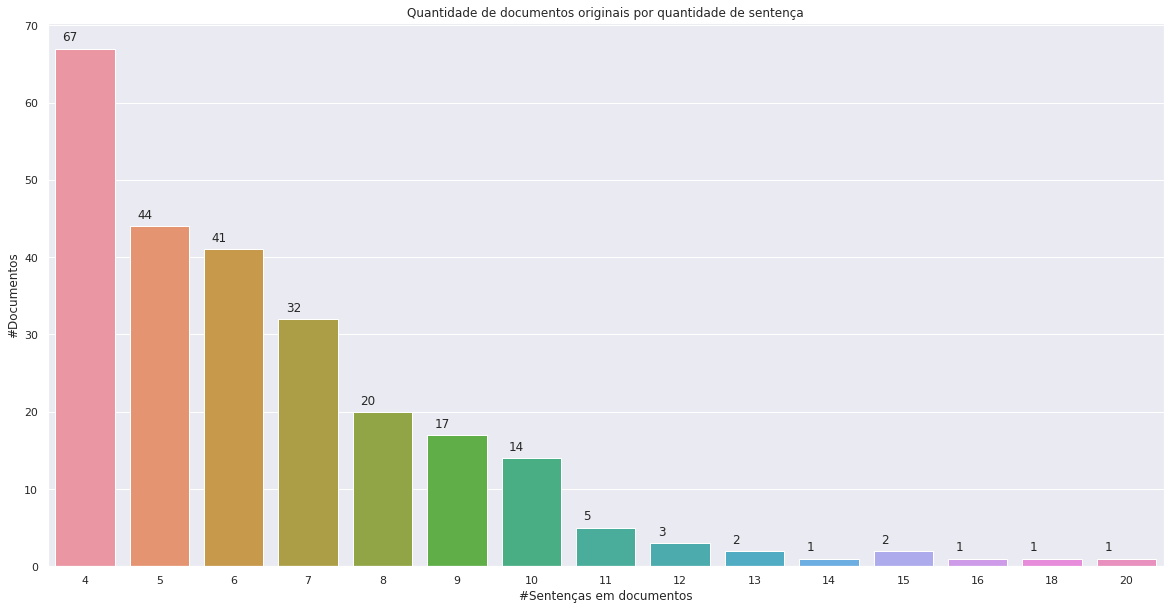

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_sentenca)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de documentos originais por quantidade de sentença')
plt.xlabel('#Sentenças em documentos')
plt.ylabel('#Documentos')

plt.show()

### 5.2.5 Gráfico Quantidade de documentos originais por quantidade de palavras

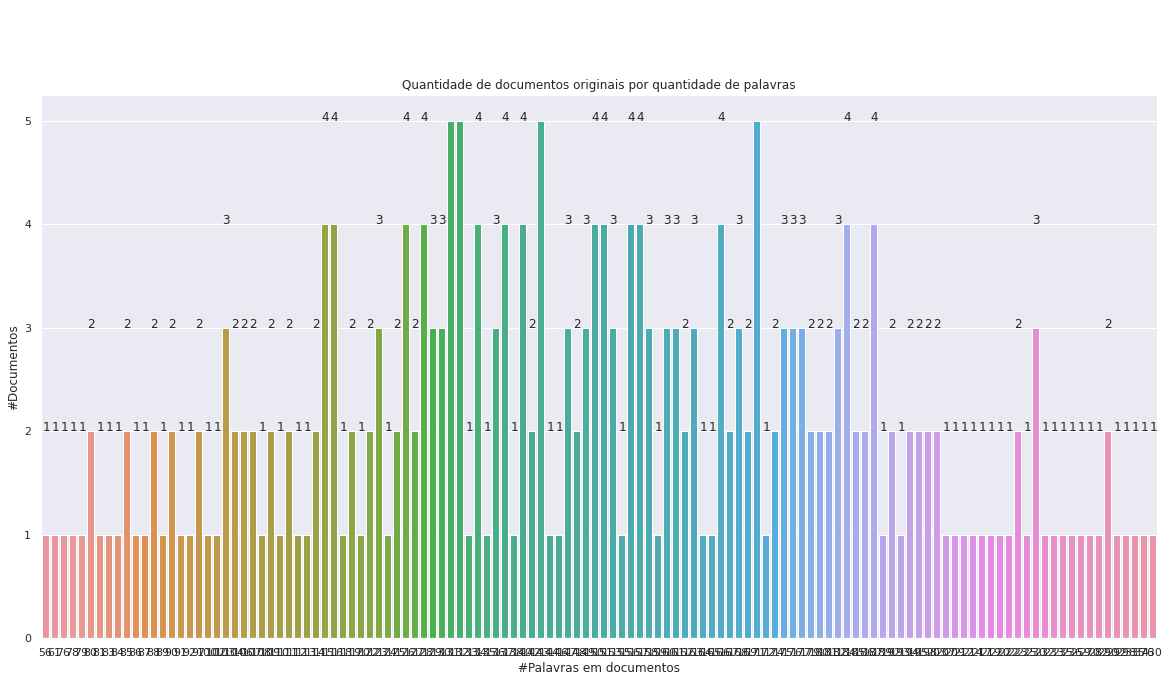

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_palavra)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de documentos originais por quantidade de palavras')
plt.xlabel('#Palavras em documentos')
plt.ylabel('#Documentos')

plt.show()

### 5.2.6 Gráfico Quantidade de documentos originais por quantidade de tokens

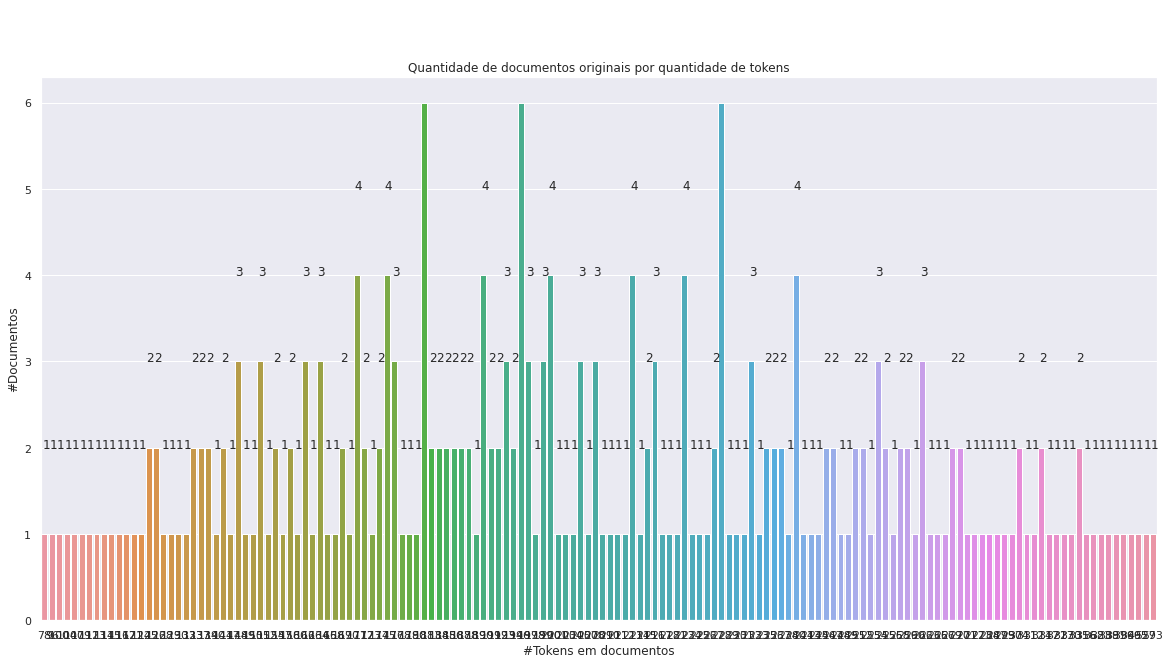

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_token)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de documentos originais por quantidade de tokens')
plt.xlabel('#Tokens em documentos')
plt.ylabel('#Documentos')

plt.show()

### 5.2.7 Gráfico Quantidade de documentos originais por quantidade de palavras substantivas

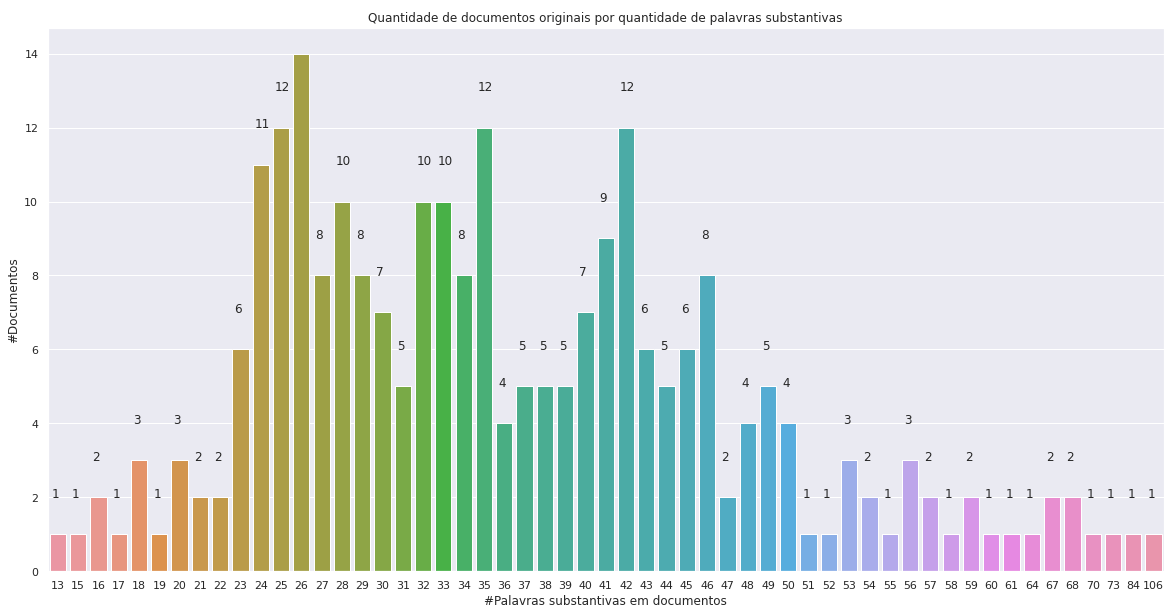

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_palavra_somente_substantivo)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de documentos originais por quantidade de palavras substantivas')
plt.xlabel('#Palavras substantivas em documentos')
plt.ylabel('#Documentos')

plt.show()

### 5.2.8 Gráfico Quantidade de documentos originais por quantidade de palavras desconsiderando as stopword

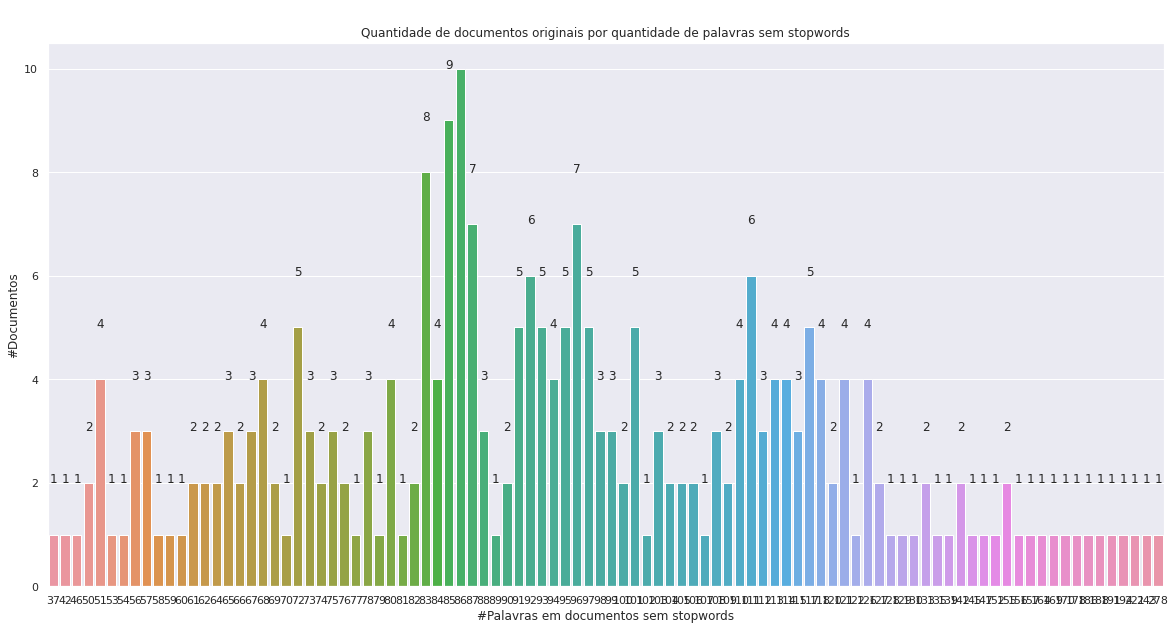

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_palavra_sem_stopword)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de documentos originais por quantidade de palavras sem stopwords')
plt.xlabel('#Palavras em documentos sem stopwords')
plt.ylabel('#Documentos')

plt.show()

### 5.2.9 Gráfico Quantidade de sentenças de documentos originais por quantidade de palavras

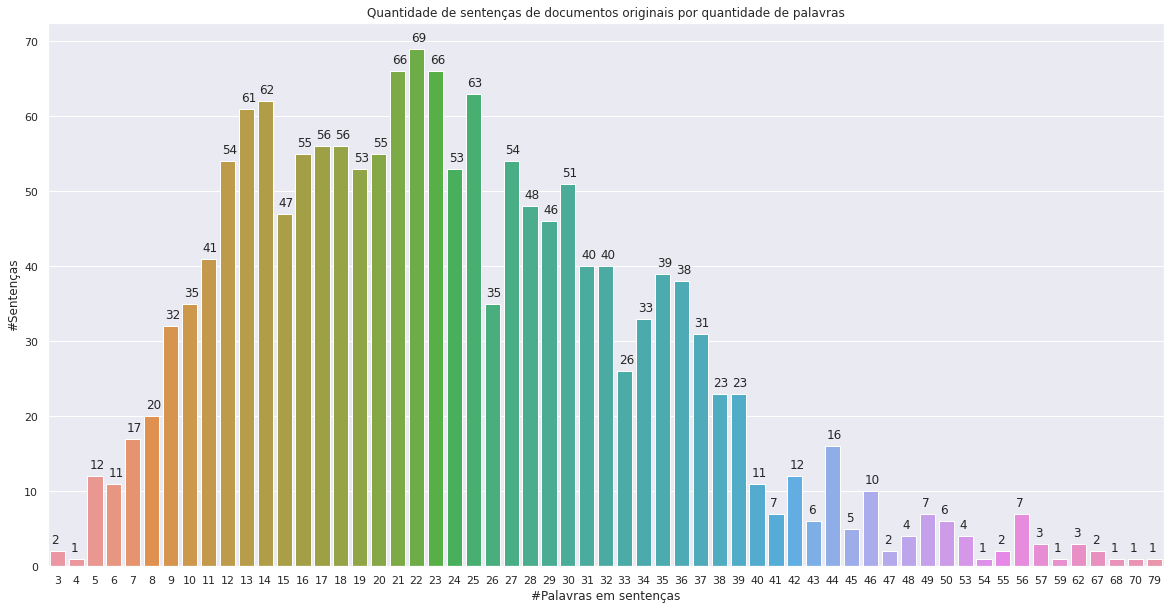

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_sentenca_palavra)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de sentenças de documentos originais por quantidade de palavras')
plt.xlabel('#Palavras em sentenças')
plt.ylabel('#Sentenças')

plt.show()

### 5.2.10 Gráfico Quantidade de sentenças de documentos originais por quantidade de tokens

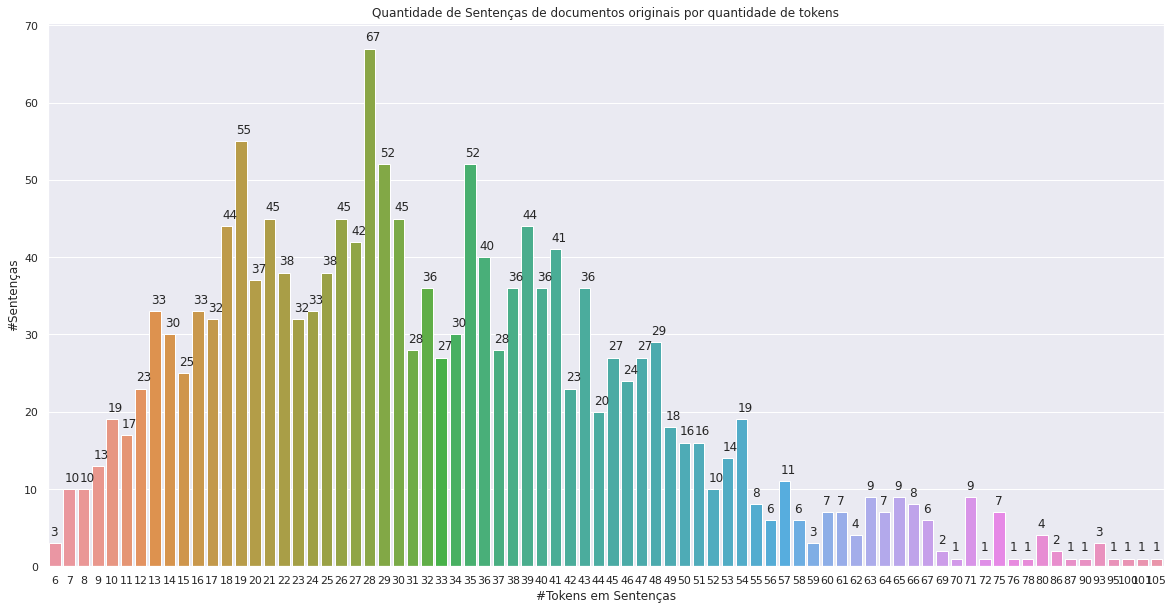

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_sentenca_token)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de Sentenças de documentos originais por quantidade de tokens')
plt.xlabel('#Tokens em Sentenças')
plt.ylabel('#Sentenças')

plt.show()

### 5.2.11 Gráfico Quantidade de Sentenças de documentos originais por quantidade de palavras substantivas

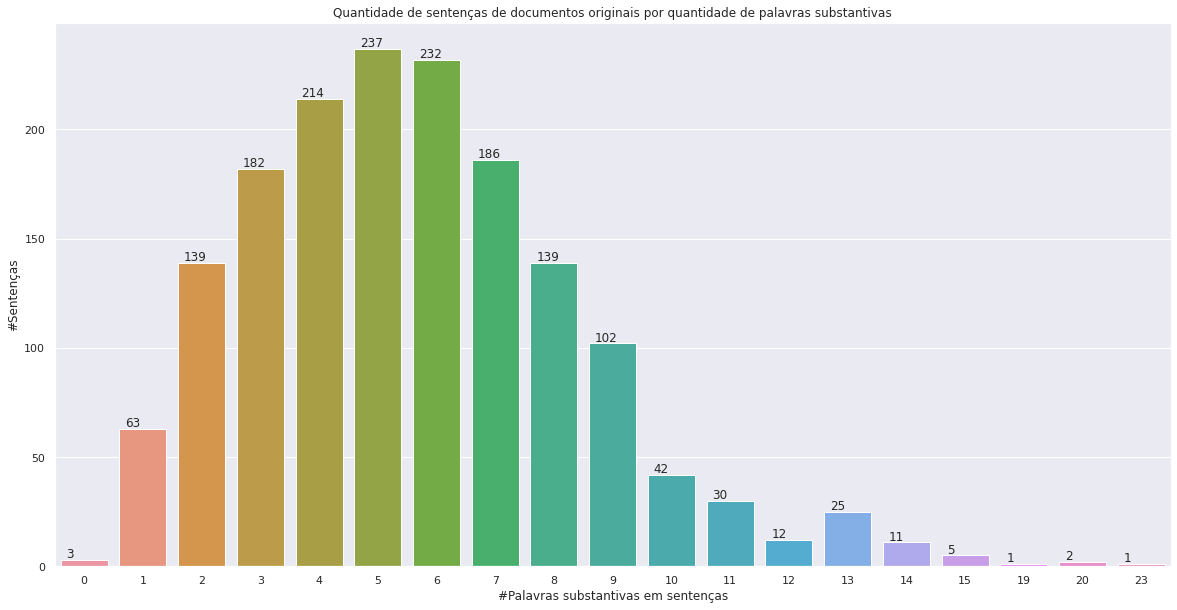

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_sentenca_palavra_somente_substantivo)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de sentenças de documentos originais por quantidade de palavras substantivas')
plt.xlabel('#Palavras substantivas em sentenças')
plt.ylabel('#Sentenças')

plt.show()

### 5.2.12 Gráfico Quantidade de sentenças de documentos originais por quantidade de palavras desconsiderando stopwords

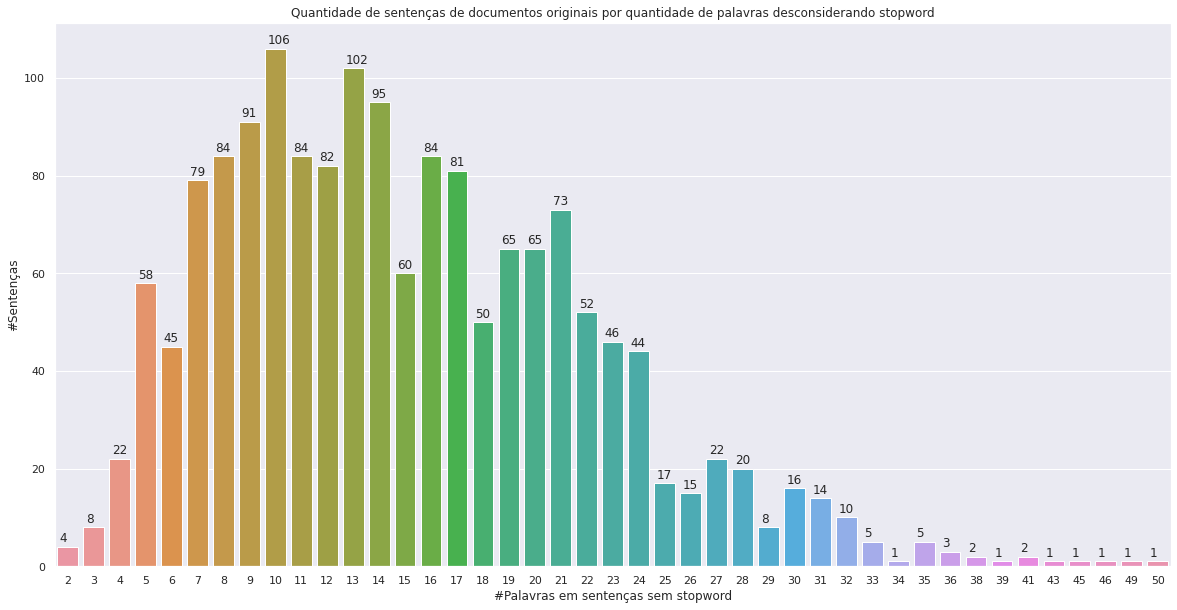

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_sentenca_palavra_sem_stopword)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de sentenças de documentos originais por quantidade de palavras desconsiderando stopword')
plt.xlabel('#Palavras em sentenças sem stopword')
plt.ylabel('#Sentenças')

plt.show()

## 5.3 Estatísticas Dados Permutados

### 5.3.1 Quantidade de sentenças e palavras por documento permutado



In [ ]:
# Lista das estatísticas
stats_documentos = []
stats_sentencas_palavras = []

# Lista para o gráfico
grafico_documentos_sentenca = []
grafico_documentos_palavra = []
grafico_documentos_palavra_somente_substantivo = []
grafico_documentos_palavra_sem_stopword  = []

grafico_documentos_token = []
grafico_documentos_sentenca_palavra = []
grafico_documentos_sentenca_palavra_somente_substantivo = []
grafico_documentos_sentenca_palavra_sem_stopword = []
grafico_documentos_sentenca_token = []

print("Processando",len(lista_documentos_permutados),"documentos permutados")

totalSentencasGeral = 0
totalPalavrasGeral = 0
totalPalavrasSubstantivasGeral = 0
totalPalavrasSemStopWordsGeral = 0
totalTokensGeral = 0

for linha_documento in lista_documentos_permutados:

    totalSentencasGeral = totalSentencasGeral + len(linha_documento[1])

    totalPalavrasDocumento = 0
    totalPalavrasSubstantivaDocumento = 0
    totalPalavrasSemStopWordDocumento = 0
    totalTokensDocumento = 0
    
    for sentenca in linha_documento[1]:

      # Quantidade de palavras por sentença
      qtdePalavra = len(sentenca.split(" "))

      # Retorna a sentença somente com as palavras salientes substantivas da sentença
      #sentencaSomenteComSubstantivo = retornaSaliente(sentenca)
      sentencaSomenteComSubstantivo = retornaPalavraRelevante(sentenca, nlp, tipo_palavra_relevante='NOUN')

      # Quantidade de palavras por sentença somente com substantivo      
      qtdePalavraSomenteComSubstantivo = 0
      if sentencaSomenteComSubstantivo.strip() != "":
          qtdePalavraSomenteComSubstantivo = 1
          if " " in sentencaSomenteComSubstantivo:
              qtdePalavraSomenteComSubstantivo = len(sentencaSomenteComSubstantivo.split(" "))

      # Retorna a sentença sem as stopwords
      sentencaSemStopWords = removeStopWord(sentenca, getStopwords(nlp))

      # Quantidade de palavras por sentenca sem as stopwords
      qtdePalavraSemStopword = 0
      if sentencaSemStopWords.strip() != "":
          qtdePalavraSemStopword = 1
          if " " in sentencaSemStopWords:
              qtdePalavraSemStopword = len(sentencaSemStopWords.split(" "))
      
      # Acumula a quantidade de palavras da sentença
      totalPalavrasDocumento = totalPalavrasDocumento + qtdePalavra

      # Acumula a quantidade de palavras da sentença só com substantivo
      totalPalavrasSubstantivaDocumento = totalPalavrasSubstantivaDocumento + qtdePalavraSomenteComSubstantivo

      # Acumula a quantidade de palavras da sentença sem stopwords
      totalPalavrasSemStopWordDocumento = totalPalavrasSemStopWordDocumento + qtdePalavraSemStopword

      # Salva a quantidade de palavras da sentença
      grafico_documentos_sentenca_palavra.append(qtdePalavra)

      # Salva a quantidade de palavras somente substantivos da sentença 
      grafico_documentos_sentenca_palavra_somente_substantivo.append(qtdePalavraSomenteComSubstantivo)

       # Salva a quantidade de palavras sem as stopwords da sentença 
      grafico_documentos_sentenca_palavra_sem_stopword.append(qtdePalavraSemStopword)

      # Divide a sentença em tokens
      sentenca_tokenizada = tokenizer.tokenize(sentenca)

      # Quantidade de tokens por sentença
      qtdeToken = len(sentenca_tokenizada)     

      # Acumula a quantidade de tokens da sentença
      totalTokensDocumento = totalTokensDocumento + qtdeToken
     
      # Guarda a quantidade de tokens da sentença com pergunta do intervalo
      grafico_documentos_sentenca_token.append(qtdeToken)

      # Registra as estatística da quantidade de palavras da sentença
      stats_sentencas_palavras.append(
         {  
            'id': linha_documento[0],  
            'qtdepalavras' : qtdePalavra,            
            'qtdesubstantivos' : qtdePalavraSomenteComSubstantivo,
            'qtdepalavrassemstopword' : qtdePalavraSemStopword,
            'qtdetokens' : qtdeToken,    
         }
      )

    # Guarda o total de palavras do conjunto de dados
    totalPalavrasGeral = totalPalavrasGeral + totalPalavrasDocumento

    # Guarda o total de palavras do conjunto de dados
    totalPalavrasSubstantivasGeral = totalPalavrasSubstantivasGeral + totalPalavrasSubstantivaDocumento

    # Guarda o total de palavras do conjunto de dados
    totalPalavrasSemStopWordsGeral = totalPalavrasSemStopWordsGeral + totalPalavrasSemStopWordDocumento

    # Guarda o total de tokens do conjunto de dados
    totalTokensGeral = totalTokensGeral + totalTokensDocumento
        
    # Guarda a quantidade de sentenças do documento com pergunta do intervalo
    grafico_documentos_sentenca.append(len(linha_documento[1]))

    # Guarda a quantidade de palavras do documento com pergunta do intervalo
    grafico_documentos_palavra.append(totalPalavrasDocumento)

    # Guarda a quantidade de palavras somente substantivas do documento com pergunta do intervalo
    grafico_documentos_palavra_somente_substantivo.append(totalPalavrasSubstantivaDocumento)
    
    # Guarda a quantidade de palavras sem stopword do documento com pergunta do intervalo
    grafico_documentos_palavra_sem_stopword.append(totalPalavrasSemStopWordDocumento)

    # Guarda a quantidade de tokens do documento com pergunta do intervalo
    grafico_documentos_token.append(totalTokensDocumento)

    # Registra as estatística da divisão
    stats_documentos.append(
      {  
        'id': linha_documento[0], 
        'qtdesentencas': len(linha_documento[1]),
        'qtdepalavras' : totalPalavrasDocumento,
        'qtdepalavrassubstantiva' : totalPalavrasSubstantivaDocumento,
        'qtdepalavrassemstopword' : totalPalavrasSemStopWordDocumento,
        'qtdetokens' : totalTokensDocumento  
      }
    )

print("Total de sentenças              : ",totalSentencasGeral)
print("Total de palavras               : ",totalPalavrasGeral)
print("Total de palavras substantivas  : ",totalPalavrasSubstantivasGeral)     
print("Total de palavras sem stopwords : ", totalPalavrasSemStopWordsGeral)
print("Total de tokens                 : ",totalTokensGeral)     

Processando 5020 documentos permutados
Total de sentenças              :  32520
Total de palavras               :  776060
Total de palavras substantivas  :  183640
Total de palavras sem stopwords :  490840
Total de tokens                 :  1064000


### 5.3.2 Estatísticas de sentenças e palavras por documento permutado

In [ ]:
# Import das bibliotecas
import pandas as pd

# Mostra somente com duas casas decimais os números reais
pd.set_option('precision', 2)

# Cria um DataFrame das estatísticas
df_stats = pd.DataFrame(data=stats_documentos)

df_stats.describe(include='all')

,id,qtdesentencas,qtdepalavras,qtdepalavrassubstantiva,qtdepalavrassemstopword,qtdetokens
count,5020,5020.00,5020.00,5020.00,5020.00,5020.00
unique,5020,NaN,NaN,NaN,NaN,NaN
top,C2_Extrato_6_Perm_18.txt,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.48,154.59,36.58,97.78,211.95
std,NaN,2.63,49.77,12.56,32.11,67.95
min,NaN,4.00,56.00,13.00,37.00,78.00
25%,NaN,4.00,125.00,27.00,80.00,171.00
50%,NaN,6.00,150.00,35.00,93.00,200.00
75%,NaN,8.00,177.00,43.00,112.00,243.00


### 5.3.3 Estatísticas de palavras por sentença de documento permutado

In [ ]:
# Import das bibliotecas
import pandas as pd

# Mostra somente com duas casas decimais os números reais
pd.set_option('precision', 2)

# Cria um DataFrame das estatísticas
df_stats = pd.DataFrame(data=stats_sentencas_palavras)

df_stats.describe(include='all')

,id,qtdepalavras,qtdesubstantivos,qtdepalavrassemstopword,qtdetokens
count,32520,32520.00,32520.00,32520.00,32520.00
unique,5020,NaN,NaN,NaN,NaN
top,C27_Extrato_6_Perm_7.txt,NaN,NaN,NaN,NaN
freq,20,NaN,NaN,NaN,NaN
mean,NaN,23.86,5.65,15.09,32.72
std,NaN,10.68,2.84,7.09,15.26
min,NaN,3.00,0.00,2.00,6.00
25%,NaN,16.00,4.00,10.00,21.00
50%,NaN,23.00,5.00,14.00,30.00
75%,NaN,30.00,7.00,20.00,42.00


### 5.3.4 Gráfico Quantidade de documentos permutados por quantidade de sentenças

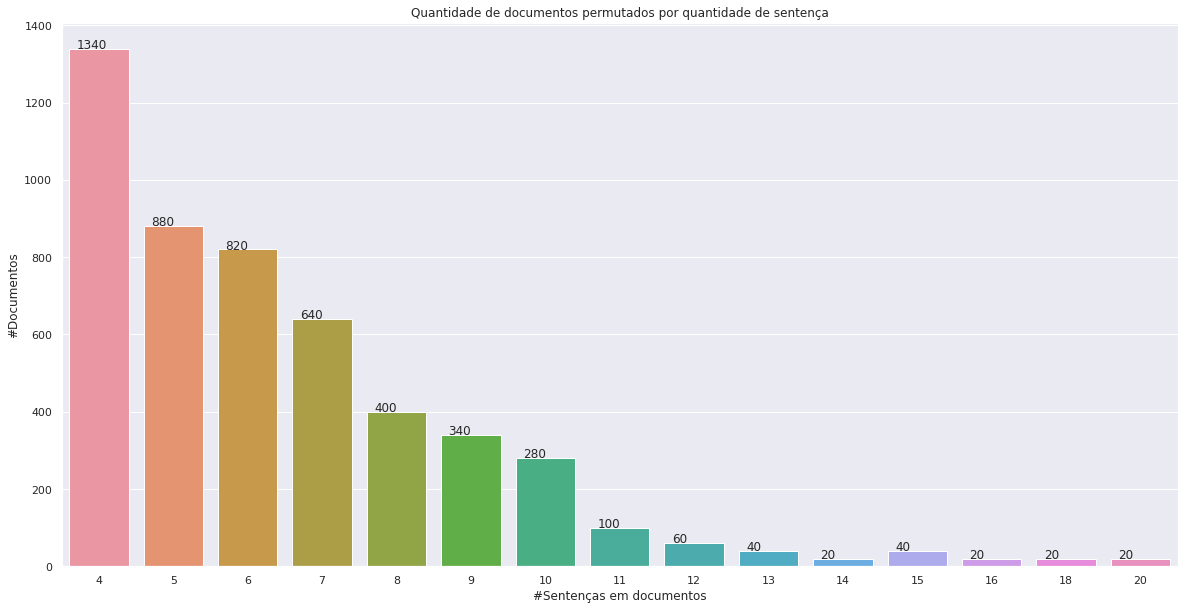

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_sentenca)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de documentos permutados por quantidade de sentença')
plt.xlabel('#Sentenças em documentos')
plt.ylabel('#Documentos')

plt.show()

### 5.3.5 Gráfico Quantidade de documentos permutados por quantidade de palavras

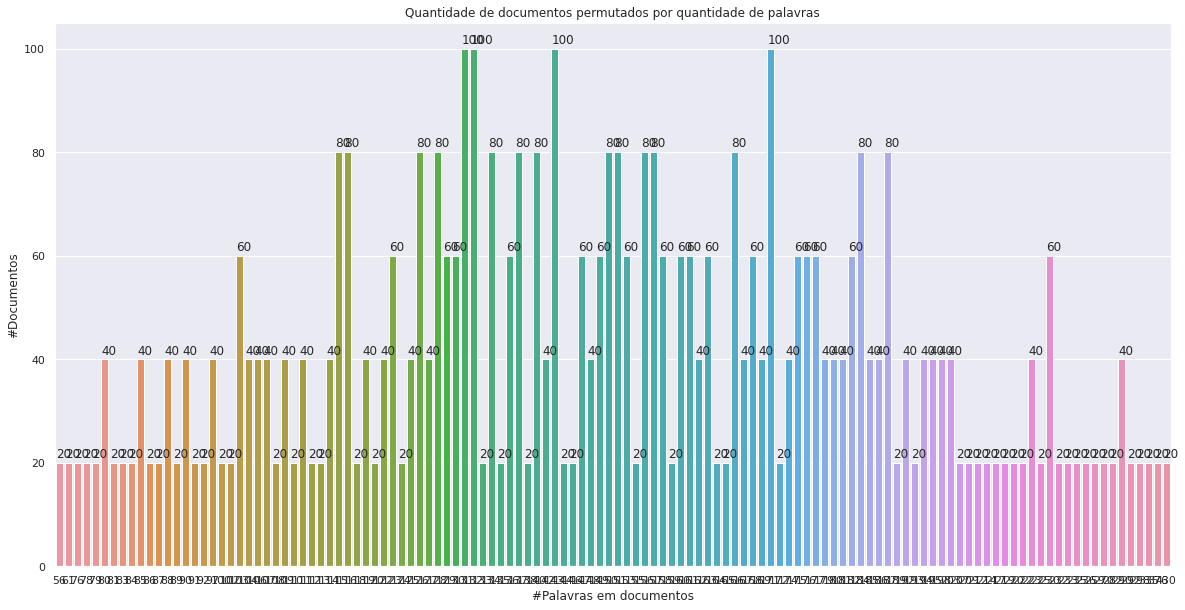

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_palavra)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de documentos permutados por quantidade de palavras')
plt.xlabel('#Palavras em documentos')
plt.ylabel('#Documentos')

plt.show()

### 5.3.6 Gráfico Quantidade de documentos permutados por quantidade de tokens

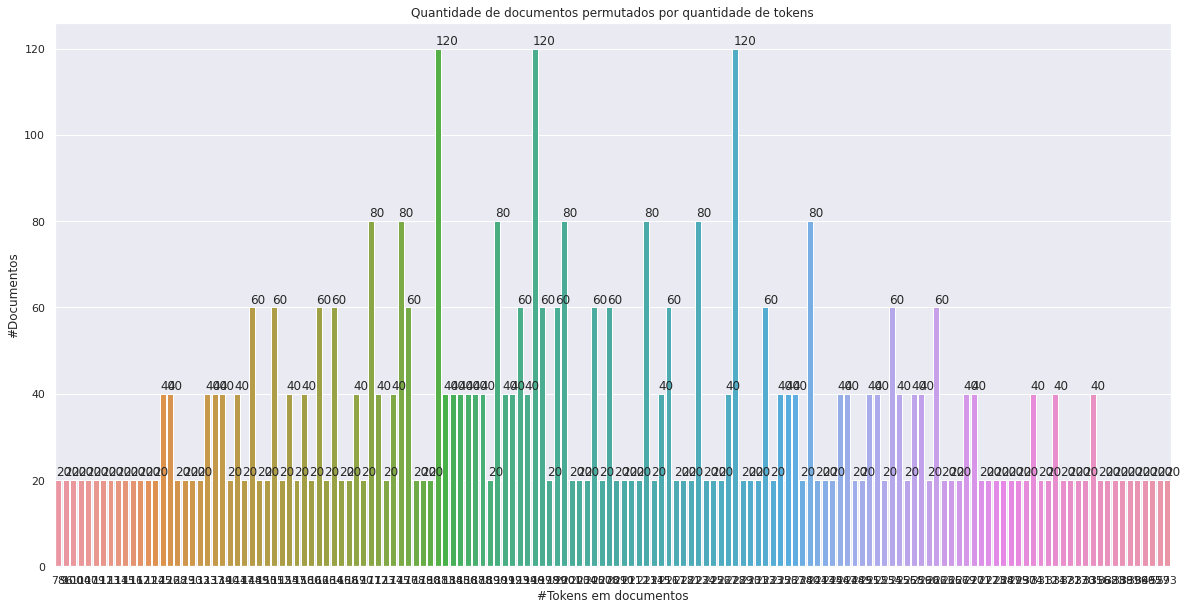

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_token)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de documentos permutados por quantidade de tokens')
plt.xlabel('#Tokens em documentos')
plt.ylabel('#Documentos')

plt.show()

### 5.3.7 Gráfico Quantidade de documentos originais por quantidade de palavras substantivas

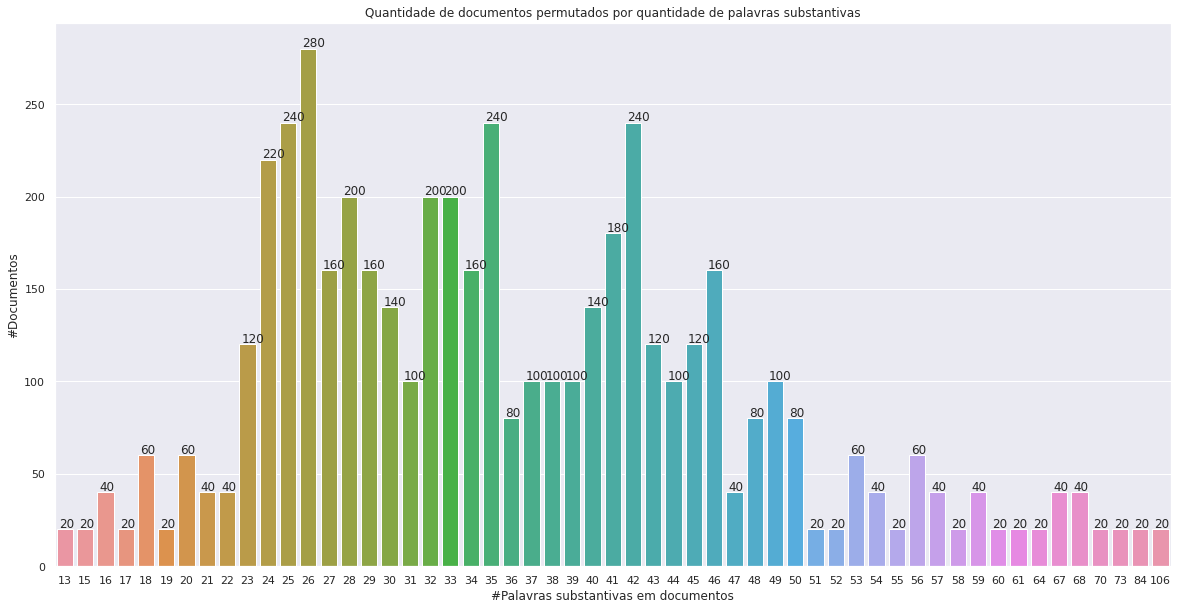

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_palavra_somente_substantivo)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de documentos permutados por quantidade de palavras substantivas')
plt.xlabel('#Palavras substantivas em documentos')
plt.ylabel('#Documentos')

plt.show()

### 5.3.8 Gráfico Quantidade de documentos originais por quantidade de palavras desconsiderando as stopword

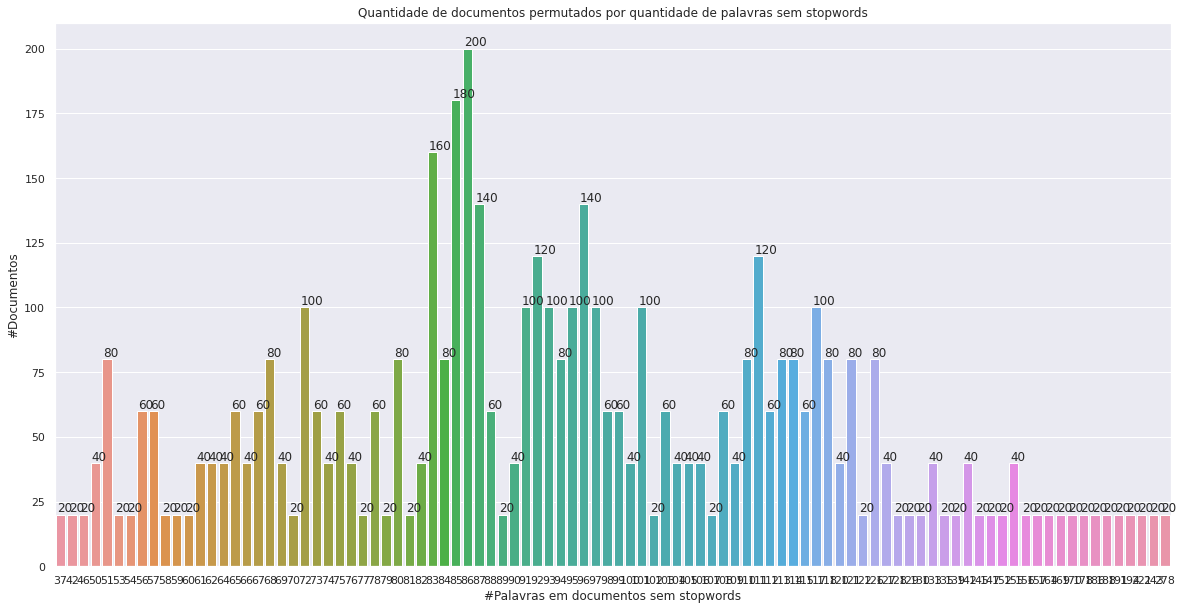

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_palavra_sem_stopword)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de documentos permutados por quantidade de palavras sem stopwords')
plt.xlabel('#Palavras em documentos sem stopwords')
plt.ylabel('#Documentos')

plt.show()

### 5.3.9 Gráfico Quantidade de sentenças de documentos permutados por quantidade de palavras

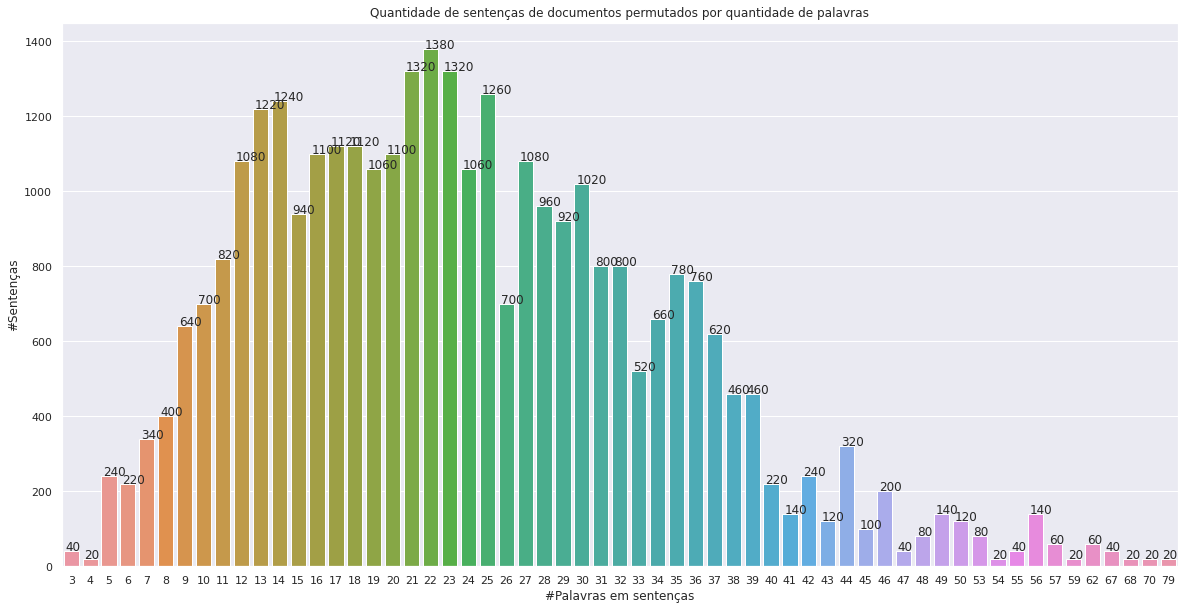

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_sentenca_palavra)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de sentenças de documentos permutados por quantidade de palavras')
plt.xlabel('#Palavras em sentenças')
plt.ylabel('#Sentenças')

plt.show()

### 5.3.10 Gráfico Quantidade de sentenças de documentos permutados por quantidade de tokens

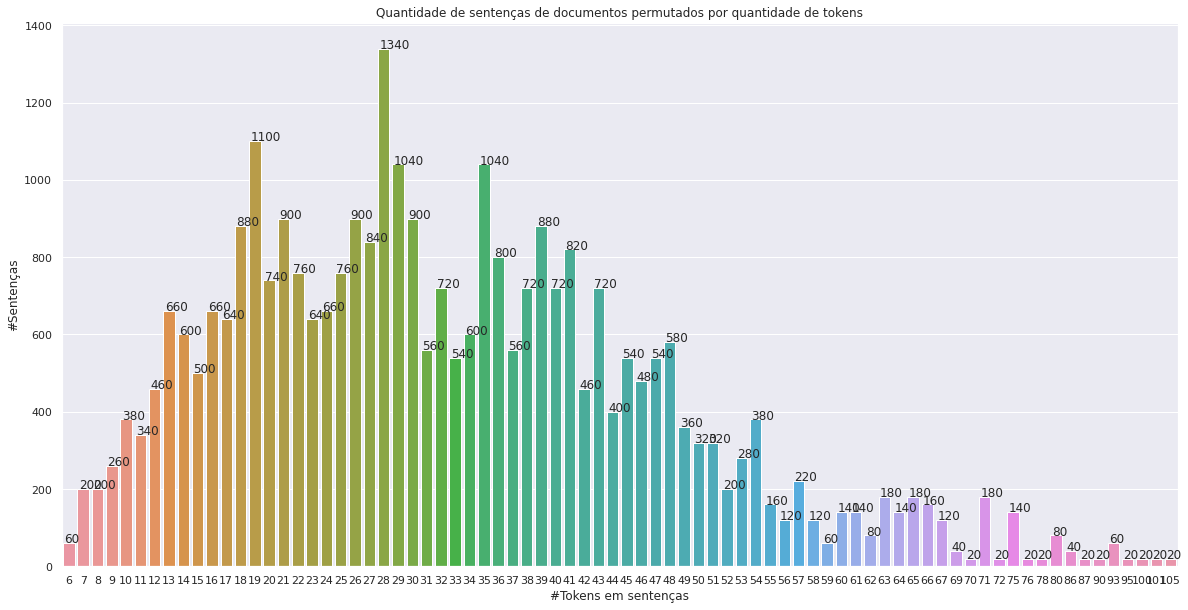

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_sentenca_token)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de sentenças de documentos permutados por quantidade de tokens')
plt.xlabel('#Tokens em sentenças')
plt.ylabel('#Sentenças')

plt.show()

### 5.3.11 Gráfico Quantidade de sentenças em documentos originais por quantidade de palavras substantivas

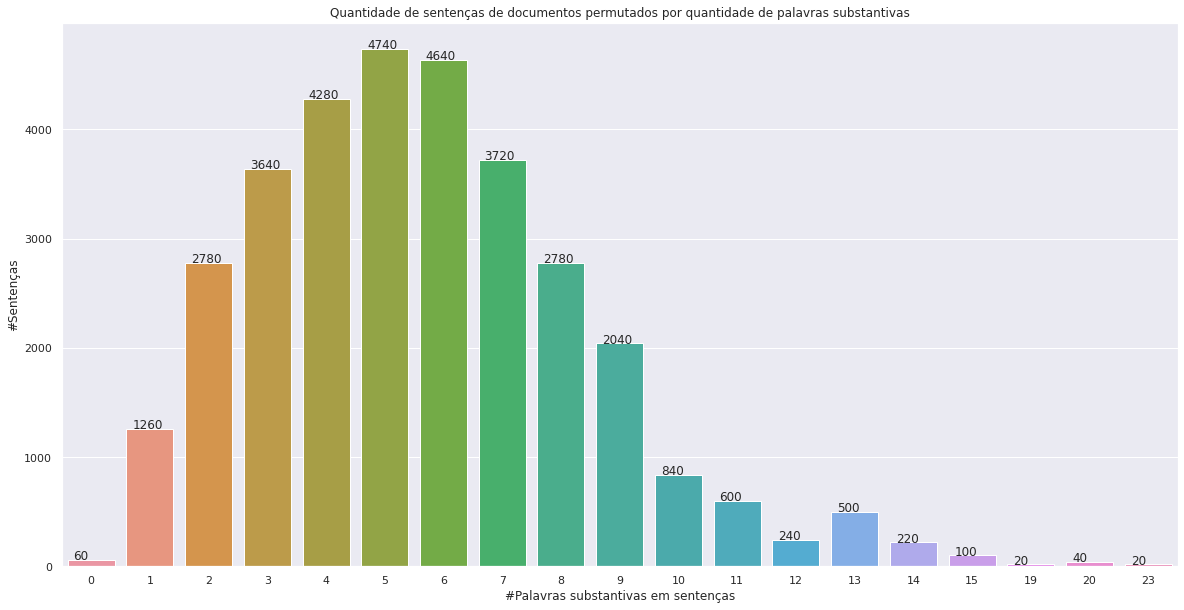

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_sentenca_palavra_somente_substantivo)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de sentenças de documentos permutados por quantidade de palavras substantivas')
plt.xlabel('#Palavras substantivas em sentenças')
plt.ylabel('#Sentenças')

plt.show()

### 5.3.12 Gráfico Quantidade de sentenças em documentos originais por quantidade de palavras desconsiderando stopwords

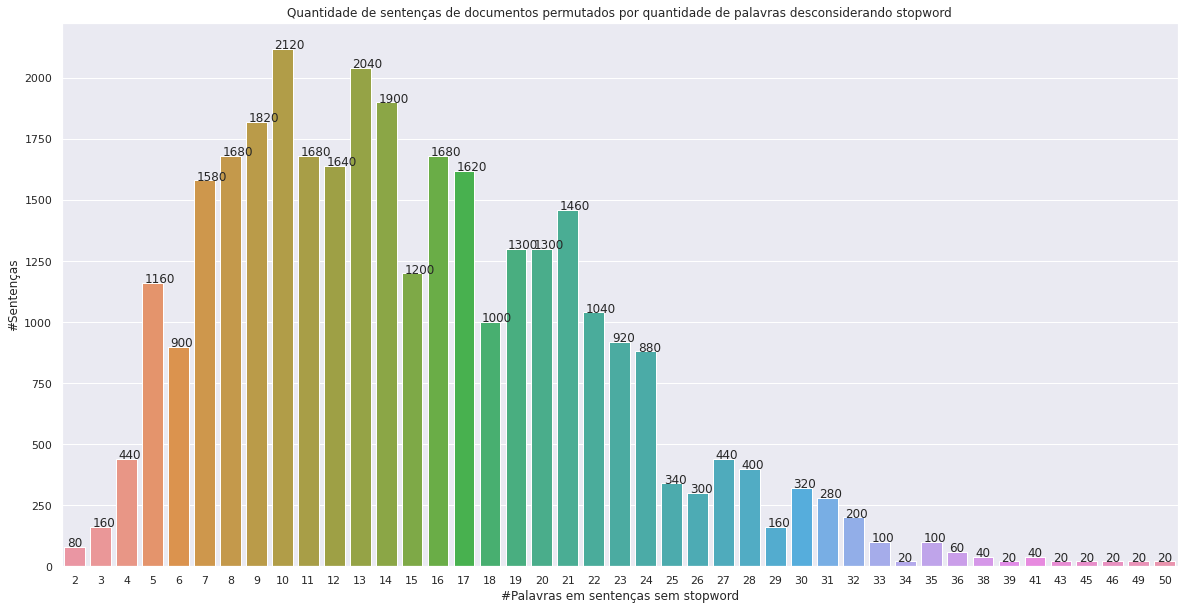

In [ ]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumenta o tamanho da plotagem e o tamanho da fonte.
plt.rcParams["figure.figsize"] = (20,10)

# Plota o número de tokens de cada tamanho
ax = sns.countplot(x=grafico_documentos_sentenca_palavra_sem_stopword)

# Adiciona os valores as colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+1))

plt.title('Quantidade de sentenças de documentos permutados por quantidade de palavras desconsiderando stopword')
plt.xlabel('#Palavras em sentenças sem stopword')
plt.ylabel('#Sentenças')

plt.show()

# 6 Finalização

## 6.1 Tempo final de processamento


In [ ]:
# Pega o tempo atual menos o tempo do início do processamento.
finalProcessamento = time.time()
tempoTotalProcessamento = formataTempo(finalProcessamento - inicioProcessamento)

print("")
print("  Tempo processamento:  {:} (h:mm:ss)".format(tempoTotalProcessamento))


  Tempo processamento:  0:05:23 (h:mm:ss)
